# Customizations: LSteinPanel
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TheRedElement/LStein/blob/main/demo/customizing_LSteinPanel.ipynb)

If you run this notebook in [google colab](https://colab.google/), you should not need to install anything else.
You might, however, need to restart your session to have the required versions of [matplotlib](https://matplotlib.org/), [numpy](https://numpy.org/), [Plotly](https://plotly.com/python/) ready.

In [1]:
#in case you are in colab
import sys
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !pip3 install git+https://github.com/TheRedElement/LStein.git

In [2]:
#%%imports
import importlib
import numpy as np
import polars as pl

from lstein import (
    utils as lsu,
    makedata as md
)
from lstein import lstein
importlib.reload(lstein)


<module 'lstein.lstein' from '/home/lukas/github/LStein/src/lstein/lstein.py'>

### Get Data

In [3]:
#generate some data
raw, pro = md.simulate(opt="sin", theta=np.array([10,15,20,25,30]))
df_raw = pl.from_dict(raw)
df_pro = pl.from_dict(pro)
print(df_raw)

shape: (2_500, 5)
┌────────┬────────────┬───────────┬─────────────┬────────────┐
│ period ┆ time       ┆ amplitude ┆ amplitude_e ┆ processing │
│ ---    ┆ ---        ┆ ---       ┆ ---         ┆ ---        │
│ i64    ┆ f64        ┆ f64       ┆ f64         ┆ str        │
╞════════╪════════════╪═══════════╪═════════════╪════════════╡
│ 10     ┆ -50.0      ┆ 0.032611  ┆ NaN         ┆ raw        │
│ 10     ┆ -49.699399 ┆ 0.65569   ┆ NaN         ┆ raw        │
│ 10     ┆ -49.398798 ┆ 0.52309   ┆ NaN         ┆ raw        │
│ 10     ┆ -49.098196 ┆ -0.074534 ┆ NaN         ┆ raw        │
│ 10     ┆ -49.098196 ┆ 0.516339  ┆ NaN         ┆ raw        │
│ …      ┆ …          ┆ …         ┆ …           ┆ …          │
│ 30     ┆ 99.098196  ┆ 1.014112  ┆ NaN         ┆ raw        │
│ 30     ┆ 99.398798  ┆ 0.687929  ┆ NaN         ┆ raw        │
│ 30     ┆ 99.699399  ┆ 0.916537  ┆ NaN         ┆ raw        │
│ 30     ┆ 99.699399  ┆ 0.875985  ┆ NaN         ┆ raw        │
│ 30     ┆ 100.0      ┆ 1.203139  ┆ N

In [4]:
#get dimensions

##raw
df_raw_p = df_raw.partition_by("period")    #partition by unique values in `"period"`
theta_raw = [df["period"].to_numpy()[0] for df in df_raw_p]    #only one value per series
x_raw = [df["time"].to_numpy() for df in df_raw_p]             #K values per series
y_raw = [df["amplitude"].to_numpy() for df in df_raw_p]        #K values per series

##processed
df_pro_p = df_pro.partition_by("period")    #partition by unique values in `"period"`
theta_pro = [df["period"].to_numpy()[0] for df in df_pro_p]    #only one value per series
x_pro = [df["time"].to_numpy() for df in df_pro_p]             #K values per series
y_pro = [df["amplitude"].to_numpy() for df in df_pro_p]        #K values per series

### Setup Canvas

In [5]:
#global parameters
thetaticks = np.array(theta_raw).astype(int)
xticks = np.linspace(-45, 80, 6).astype(int)
yticks = np.linspace(-1,1,3).astype(int)

thetalabel = r"$\theta$"
xlabel = r"$x$"
ylabel = r"$y$"


In [6]:
panelsize = np.pi/8
thetaguidelims = (0,2*np.pi-panelsize/2)
LSC = lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks,
    thetaguidelims=thetaguidelims, thetaplotlims=(thetaguidelims[0]+panelsize/2, thetaguidelims[1]-panelsize/2),
    panelsize=panelsize,
    thetalabel=thetalabel, xlabel=xlabel, ylabel=ylabel,
)


### Add Panels and Data

In [7]:
panel_kwargs = [
    dict(), #default
    dict(yticks=[-1,0.5,0.0,1.0]),                      #custom y-ticks
    dict(panelsize=np.pi/4),                            #custom panel size
    dict(show_panelbounds=False, show_yticks=False),    #no y-grid, no panel-boundary
    dict(y_projection_method="y"),                      #other way of projecting the data
]
#add panels
for i in range(len(theta_raw)):
    
    #add a panel (similar to `ax = fig.add_subplot()`)
    LSP = LSC.add_panel(
        theta=theta_raw[i], #add panel at `theta_raw[i]`
        **panel_kwargs[i],
    )

    #add a series to the panel
    LSP.plot(x_pro[i], y_pro[i], seriestype="line", lw=3)


### Display Plot

/tmp/ipykernel_436276/3669075235.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


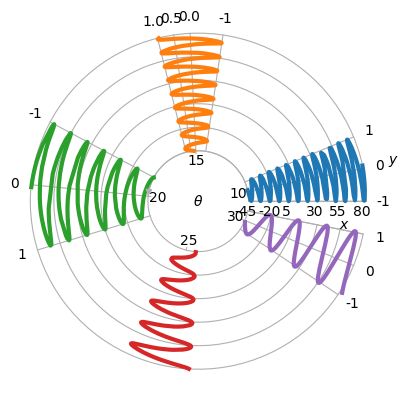

In [8]:
fig = lstein.draw(LSC)
fig.show()